In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bru = pd.read_csv("Paul_Brussel.csv", sep=";")
paris = pd.read_csv("Paul_Paris.csv", sep=";")

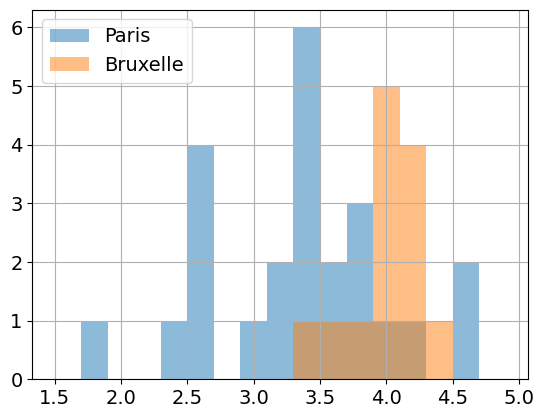

In [ ]:
bin_edges = np.arange(1.5, 5.1, 0.2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()


plt.hist(paris["Evaluation"], bins=bin_edges, alpha=0.5, label="Paris")
plt.hist(bru["Evaluation"], bins=bin_edges, alpha=0.5, label="Bruxelle")

plt.legend(fontsize=14, loc="upper left")
plt.show()

<ipython-input-8-76b1bd5d13da>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ville', y='Evaluation', data=parisBru, palette={'Paris':'#1f77b4', 'Brussel':'#ff7f0e'}, boxprops=dict(alpha=0.5))


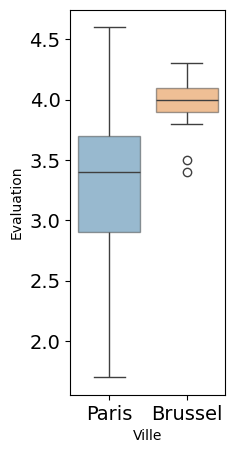

In [ ]:
# 各データフレームに「都市」列を追加
bru['Ville'] = 'Brussel'
paris['Ville'] = 'Paris'

# 評価と都市を持つ2つのデータフレームを縦結合
parisBru = pd.concat([paris[['Evaluation', 'Ville']], bru[['Evaluation', 'Ville']]], ignore_index=True)

plt.figure(figsize=(2, 5))
sns.boxplot(x='Ville', y='Evaluation', data=parisBru, palette={'Paris':'#1f77b4', 'Brussel':'#ff7f0e'}, boxprops=dict(alpha=0.5))
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.show()

# データ確認

# 正規性検定

In [ ]:
from scipy.stats import shapiro
stat_b, p_b = shapiro(bru["Evaluation"])
p_b

np.float64(0.15383666835465148)

In [ ]:
stat_p, p_p = shapiro(paris['Evaluation'])
p_p

np.float64(0.7124108594708701)

# 等分散性確認（Levene検定）

In [ ]:
from scipy.stats import levene

stat, p = levene(bru['Evaluation'], paris['Evaluation'])
print(f"Levene検定のp値={p}")

if p > 0.05:
    print("等分散性あり")
else:
    print("等分散性なし（Welchのt検定が適切）")

Levene検定のp値=0.024242493313523357
等分散性なし（Welchのt検定が適切）


# t検定(等分散性なし)

In [ ]:
import scipy.stats as stats
t, p = stats.ttest_ind(bru["Evaluation"], paris["Evaluation"], equal_var=False)

In [ ]:
p

np.float64(0.000262111813929284)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas

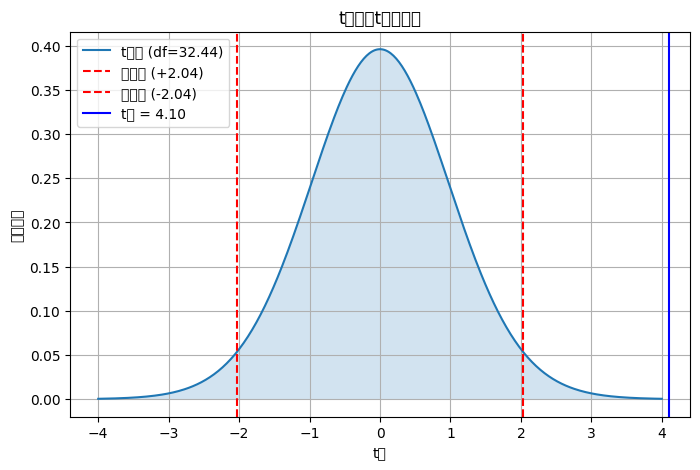

In [ ]:
# t検定 (Welchのt検定)
t, p = stats.ttest_ind(bru["Evaluation"], paris["Evaluation"], equal_var=False)

# 自由度（Welch-Satterthwaiteの近似値）
n1, n2 = len(bru["Evaluation"]), len(paris["Evaluation"])
s1, s2 = np.var(bru["Evaluation"], ddof=1), np.var(paris["Evaluation"], ddof=1)
df = (s1/n1 + s2/n2)**2 / ((s1/n1)**2/(n1-1) + (s2/n2)**2/(n2-1))

# t分布のx範囲
x = np.linspace(-4, 4, 400)
y = stats.t.pdf(x, df)

# 描画
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f't distribution (df={df:.2f})')
plt.fill_between(x, y, alpha=0.2)

# 5%有意水準の臨界値（両側）
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df)
plt.axvline(t_crit, color='red', linestyle='--', label=f'Valeur critique (+{t_crit:.2f})')
plt.axvline(-t_crit, color='red', linestyle='--', label=f'Valeur critique (-{t_crit:.2f})')

# t値の位置
plt.axvline(t, color='blue', linestyle='-', label=f't = {t:.2f}')

# ラベル等
plt.title("t distribution")
plt.xlabel("t")
plt.ylabel("densité de probabilité")
plt.legend()
plt.grid(True)
plt.show()